In [ ]:
''' Design a distributed application using RPC for remote computation where client submits an
integer value to the server and server calculates factorial and returns the result to the client
program.'''


import xmlrpc.client

# Connect to server
proxy = xmlrpc.client.ServerProxy("http://localhost:8000/", allow_none=True)

# Input from user
n = int(input("Enter an integer to compute factorial: "))

# Remote call
result = proxy.compute_factorial(n)

print(f"Factorial of {n} is:\n{result}")


#-------------------------------------------------------------

from xmlrpc.server import SimpleXMLRPCServer

# Factorial function that avoids large integers in XML-RPC by returning a string
def factorial(n):
    if n < 0:
        return "Error: Factorial is not defined for negative numbers."
    result = 1
    for i in range(2, n + 1):
        result *= i
    return str(result)  # Return as string to avoid OverflowError in XML-RPC

# Set up server
server = SimpleXMLRPCServer(("localhost", 8000), allow_none=True)
print("Server is running on port 8000...")

# Register the factorial function
server.register_function(factorial, "compute_factorial")

# Run the server
server.serve_forever()

#------------------------------------------------------------------------------------------------------------------------------
# or 

from xmlrpc.server import SimpleXMLRPCServer
import threading

# Define factorial function
def factorial(n):
    if n == 0 or n == 1:
        return 1
    return n * factorial(n - 1)

# Start server in background
def run_server():
    server = SimpleXMLRPCServer(("localhost", 8000), logRequests=False)
    server.register_function(factorial, "factorial")
    print("🔁 Server started on http://localhost:8000")
    server.serve_forever()

# Run server in background thread
threading.Thread(target=run_server, daemon=True).start()


#---------------------------------------------
import xmlrpc.client

# Connect to the server
client = xmlrpc.client.ServerProxy("http://localhost:8000")

# Input number and get factorial
num = int(input("Enter a number: "))
result = client.factorial(num)

# Show result
print(f"✅ Factorial of {num} is {result}")




In [ ]:
#RMI 

from Pyro5.api import expose, Daemon
import threading

@expose
class Joiner:
    def join(self, a, b):
        return a + b

daemon = Daemon()
uri = daemon.register(Joiner)
print("URI:", uri)

threading.Thread(target=daemon.requestLoop, daemon=True).start()

#----------------------------------------------------

from Pyro5.api import Proxy

uri = "PYRO:obj_39b2e8ad60ca4fefb2332349c230b445@localhost:53362"
  # Copy from server cell output
joiner = Proxy(uri)

# Input and call
a = input("First string: ")
b = input("Second string: ")
print("Result:", joiner.join(a, b))


In [ ]:
#Fuzzt set 

# Fuzzy Sets (as simple dictionaries with elements and their membership values)
A = {'x': 0.6, 'y': 0.8}
B = {'x': 0.4, 'y': 0.5}

# 1. Union of two fuzzy sets (max value for each element)
union = {}
for key in A:
    union[key] = max(A[key], B[key])

print("Union of A and B:", union)

# 2. Intersection of two fuzzy sets (min value for each element)
intersection = {}
for key in A:
    intersection[key] = min(A[key], B[key])

print("Intersection of A and B:", intersection)

# 3. Complement of a fuzzy set (1 - value for each element)
complement_A = {}
for key in A:
    complement_A[key] = 1 - A[key]

print("Complement of A:", complement_A)

# 4. Difference of two fuzzy sets (min of A and (1 - B) for each element)
difference = {}
for key in A:
    difference[key] = min(A[key], 1 - B[key])

print("Difference of A and B:", difference)

# --- Fuzzy Relations ---

# 5. Cartesian product of fuzzy sets A and B (combining each pair of elements from A and B)
R1 = {}
for a in A:
    for b in B:
        R1[(a, b)] = min(A[a], B[b])

print("Cartesian Product of A and B (R1):", R1)

# 6. Max-Min composition of two fuzzy relations (R1 and R2)
# Creating another fuzzy relation R2 from B and A
R2 = {}
for b in B:
    for a in A:
        R2[(b, a)] = min(B[b], A[a])

print("Cartesian Product of B and A (R2):", R2)

# Max-Min composition: combining R1 and R2
composition = {}
for (a, b) in R1:
    for (b2, c) in R2:
        if b == b2:  # Matching common element (b)
            key = (a, c)
            composition[key] = max(composition.get(key, 0), min(R1[(a, b)], R2[(b2, c)]))

print("Max-Min Composition of R1 and R2:", composition)




In [ ]:
# load balancing

import time

class Server:
    def __init__(self, server_id):
        self.server_id = server_id
        self.active_connections = 0

    def handle_request(self):
        self.active_connections += 1
        print(f"Server {self.server_id} → handling request (Connections: {self.active_connections})")

    def finish_request(self):
        if self.active_connections > 0:
            self.active_connections= 1

class LoadBalancer:
    def __init__(self, servers, algorithm):
        self.servers = servers
        self.algorithm = algorithm
        self.last_server = -1

    def distribute_request(self):
        if self.algorithm == "round_robin":
            self.last_server = (self.last_server + 1) % len(self.servers)
            server = self.servers[self.last_server]

        elif self.algorithm == "least_connections":
            server = min(self.servers, key=lambda s: s.active_connections)

        else:
            raise ValueError("Unsupported algorithm")

        server.handle_request()

    def finish_some_requests(self):
        # Simulate some servers finishing their requests
        for server in self.servers:
            if server.active_connections > 0:
                self.active_connections=1
                server.finish_request()

def simulate_requests(algorithm, num_requests=9):
    print(f"\n Simulation: {algorithm.replace('_', ' ').title()} Load Balancing\n")
    servers = [Server(i) for i in range(3)]
    lb = LoadBalancer(servers, algorithm)

    for i in range(num_requests):
        print(f"\nIncoming Request {i + 1}")
        lb.distribute_request()
        time.sleep(0.4)
        if i % 3 == 2:  # every 3rd request, simulate some request completions
            print("\n Simulating request completion...")
            lb.finish_some_requests()

    print("\n Final server states:")
    for server in servers:
        print(f"Server {server.server_id} active connections: {server.active_connections}")
    print("-" * 40)

if __name__ == "__main__":
    simulate_requests("round_robin")
    simulate_requests("least_connections")




In [ ]:
# Genetic algorithm 

import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import random

# ---------- 1. Generate Simulated Data ----------
def generate_synthetic_data(samples=200):
    # Simulate features like inlet_temp, feed_flow, air_pressure, etc.
    X = np.random.uniform(low=0, high=1, size=(samples, 4))
    # Output could represent yield, moisture content, etc.
    y = (0.3 * X[:, 0] + 0.5 * X[:, 1] + 0.2 * X[:, 2] + 0.4 * X[:, 3]) + np.random.normal(0, 0.05, size=samples)
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = generate_synthetic_data()

# ---------- 2. Define Genetic Algorithm ----------
POP_SIZE = 10
GENS = 20

# Each individual is [hidden_layer_size, learning_rate_init, activation_function_index]
def create_individual():
    return [
        random.randint(5, 50),                          # hidden layer size
        10**random.uniform(-4, -1),                    # learning rate
        random.choice([0, 1, 2])                       # activation: 0=identity, 1=logistic, 2=relu
    ]

def decode_activation(index):
    return ['identity', 'logistic', 'relu'][index]

def fitness(individual):
    hidden_layer_size = individual[0]
    learning_rate = individual[1]
    activation = decode_activation(individual[2])
    
    model = MLPRegressor(hidden_layer_sizes=(hidden_layer_size,), 
                         learning_rate_init=learning_rate,
                         activation=activation,
                         max_iter=500, random_state=1)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    return -mse  # We want to minimize MSE

def selection(population, scores):
    sorted_pop = sorted(zip(population, scores), key=lambda x: x[1], reverse=True)
    return [ind for ind, score in sorted_pop[:POP_SIZE//2]]

def crossover(parent1, parent2):
    cut = random.randint(1, 2)
    child1 = parent1[:cut] + parent2[cut:]
    child2 = parent2[:cut] + parent1[cut:]
    return child1, child2

def mutate(individual):
    idx = random.randint(0, 2)
    if idx == 0:
        individual[0] = random.randint(5, 50)
    elif idx == 1:
        individual[1] = 10**random.uniform(-4, -1)
    else:
        individual[2] = random.choice([0, 1, 2])
    return individual

# ---------- 3. Run GA ----------
population = [create_individual() for _ in range(POP_SIZE)]

for gen in range(GENS):
    print(f"Generation {gen+1}")
    scores = [fitness(ind) for ind in population]
    print("Best score:", max(scores))
    selected = selection(population, scores)
    
    children = []
    while len(children) < POP_SIZE - len(selected):
        p1, p2 = random.sample(selected, 2)
        c1, c2 = crossover(p1, p2)
        children.extend([mutate(c1), mutate(c2)])
    
    population = selected + children[:POP_SIZE]

# ---------- 4. Get Best Individual ----------
best_individual = max(population, key=fitness)
print("\nBest Parameters Found:")
print("Hidden Layer Size:", best_individual[0])
print("Learning Rate:", best_individual[1])
print("Activation:", decode_activation(best_individual[2]))


In [ ]:
#Colonal 

import numpy as np

def objective_function(x):
    return x**2 - 4*x + 4

# Initialize population with random solutions
def initialize_population(pop_size, lower_bound, upper_bound):
    return np.random.uniform(lower_bound, upper_bound, pop_size)

# Evaluate fitness for each individual
def evaluate_population(population):
    return np.array([objective_function(x) for x in population])

# Select the best individuals (elitism)
def select_best_individuals(population, fitness, num_selected):
    sorted_indices = np.argsort(fitness)
    return population[sorted_indices[:num_selected]]

# Mutate the selected individuals
def mutate(selected, mutation_rate, lower_bound, upper_bound):
    return np.clip(selected + np.random.uniform(-mutation_rate, mutation_rate, selected.shape), lower_bound, upper_bound)

def clonal_selection_algorithm(pop_size, lower_bound, upper_bound, generations, mutation_rate, num_selected):
    # Initialize population
    population = initialize_population(pop_size, lower_bound, upper_bound)
    
    # Run for a number of generations
    for generation in range(generations):
        # Evaluate fitness
        fitness = evaluate_population(population)
        
        # Select the best solutions
        selected = select_best_individuals(population, fitness, num_selected)
        
        # Mutate the selected individuals
        mutated = mutate(selected, mutation_rate, lower_bound, upper_bound)
        
        # Replace the worst individuals with mutated ones
        population[np.argsort(fitness)[:num_selected]] = mutated
        
        # Print the best solution in the current generation
        best_solution = population[np.argmin(fitness)]
        print(f"Generation {generation+1}: Best Solution = {best_solution}, Fitness = {min(fitness)}")
    
    # Return the best solution after all generations
    return population[np.argmin(fitness)]


# Parameters for the algorithm
pop_size = 10          # Population size
lower_bound = -10      # Lower bound for random solutions
upper_bound = 10       # Upper bound for random solutions
generations = 50       # Number of generations
mutation_rate = 0.5    # Mutation rate
num_selected = 5       # Number of best solutions to select

# Run the Clonal Selection Algorithm
best_solution = clonal_selection_algorithm(pop_size, lower_bound, upper_bound, generations, mutation_rate, num_selected)
print(f"Best Solution: {best_solution}")





#-------------------------------------------------------------------------------------------------------

import numpy as np

# Objective: Minimize f(x) = x^2 (just a simple function)
def fitness(x):
    return x**2

# Generate random population
population = np.random.uniform(-10, 10, 5)  # 5 antibodies

for gen in range(10):  # 10 generations
    # Evaluate fitness (lower is better)
    scores = [fitness(x) for x in population]
    
    # Select best 2 antibodies
    best_idx = np.argsort(scores)[:2]
    best = [population[i] for i in best_idx]

    # Clone and mutate
    clones = []
    for x in best:
        for _ in range(3):  # 3 clones per best
            mutation = np.random.normal(0, 1)  # small change
            clones.append(x + mutation)

    # New population: best + clones
    population = best + clones

# Final best antibody
best_solution = min(population, key=fitness)
print("Best solution found:", best_solution)


In [ ]:
# immune 

import random
# Generate random signal patterns
def generate_pattern(length=10):
    return [random.randint(0, 1) for _ in range(length)]

# Calculate matching (Hamming distance)
def match(p1, p2, threshold):
    distance = sum([1 for a, b in zip(p1, p2) if a != b])
    return distance <= threshold

# Generate detectors (patterns that don't match any healthy signal)
def generate_detectors(self_set, num_detectors=20, threshold=2):
    detectors = []
    while len(detectors) < num_detectors:
        candidate = generate_pattern()
        if all(not match(candidate, self_pattern, threshold) for self_pattern in self_set):
            detectors.append(candidate)
    return detectors

# Classify input pattern using detectors
def classify(pattern, detectors, threshold=2):
    for detector in detectors:
        if match(pattern, detector, threshold):
            return "Damaged"
    return "Healthy"

# Simulate some self (normal) patterns
self_patterns = [generate_pattern() for _ in range(10)]

# Generate detectors based on self set
detectors = generate_detectors(self_patterns)

# Simulate test patterns (some normal, some damaged)
test_patterns = self_patterns[:3]  # healthy ones
test_patterns += [generate_pattern() for _ in range(3)]  # simulate new/damaged

# Classify and display results
print("=== Structure Damage Classification ===\n")
for i, pattern in enumerate(test_patterns):
    result = classify(pattern, detectors)
    print(f"Pattern {i+1}: {pattern} → {result}")


#=======================================================================
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Simulated structural data (features)
X = np.array([
    [1.0, 0.9],   # Normal
    [0.95, 0.85], # Normal
    [2.0, 2.1],   # Damaged
    [1.8, 2.2],   # Damaged
])
y = ['Normal', 'Normal', 'Damaged', 'Damaged']

# Create KNN classifier (acts like immune pattern matching)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

# Predict and print results
for i, sample in enumerate(X):
    prediction = model.predict([sample])[0]
    print(f"Sample {i+1} - Actual: {y[i]}, Predicted: {prediction}")

# Optional: Visualization
colors = {'Normal': 'blue', 'Damaged': 'red'}
for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], color=colors[y[i]], label=y[i] if i < 2 else "")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Structural Damage Classification")
plt.legend()
plt.grid(True)
plt.show()


gen	nevals	max   
0  	20    	(7.0,)
1  	16    	(8.0,)
2  	15    	(8.0,)
3  	14    	(9.0,)
4  	12    	(9.0,)
5  	10    	(9.0,)
6  	11    	(9.0,)
7  	14    	(9.0,)
8  	14    	(10.0,)
9  	7     	(10.0,)
10 	12    	(10.0,)

Best individual: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness: 10.0
gen	nevals	avg  	max
0  	50    	10.28	15 
1  	34    	12.26	15 
2  	27    	14   	16 
3  	23    	15.14	17 
4  	18    	15.88	18 
5  	23    	16.7 	19 
6  	30    	17.38	20 
7  	35    	18.04	20 
8  	37    	18.32	20 
9  	30    	18.78	20 
10 	35    	19   	20 
11 	29    	19.38	20 
12 	37    	19.68	20 
13 	30    	19.76	20 
14 	37    	19.88	20 
15 	30    	19.9 	20 
16 	38    	19.74	20 
17 	23    	19.76	20 
18 	35    	19.76	20 
19 	27    	19.72	20 
20 	33    	19.7 	20 
21 	27    	19.88	20 
22 	26    	19.8 	20 
23 	31    	19.8 	20 
24 	23    	19.58	20 
25 	31    	19.68	20 
26 	32    	19.8 	20 
27 	31    	19.8 	20 
28 	35    	19.7 	20 
29 	38    	19.8 	20 
30 	31    	19.86	20 


C:\Users\ADMIN\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\ADMIN\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


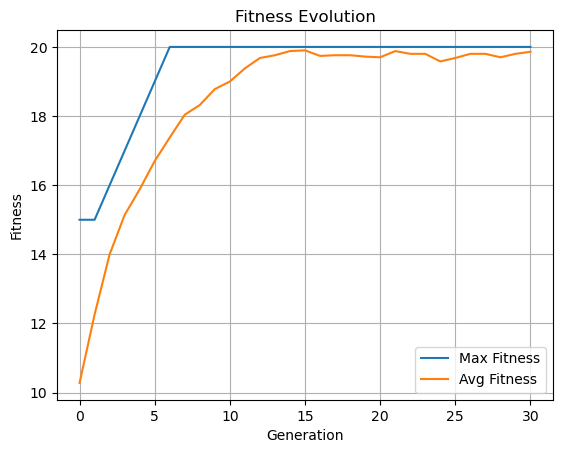


Best individual: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Best fitness: 20.0


In [5]:
#Deap
import random
from deap import base, creator, tools, algorithms
# Step 1: Define the fitness and individual
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximize
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Step 2: Individual and population generation
toolbox.register("attr_bool", random.randint, 0, 1)  # genes: 0 or 1
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Step 3: Define the fitness function
def eval_fitness(individual):
    return sum(individual),  # fitness is number of 1s

toolbox.register("evaluate", eval_fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)  # 10% mutation chance per gene
toolbox.register("select", tools.selTournament, tournsize=3)

def run_ea():
    pop = toolbox.population(n=20)
    hof = tools.HallOfFame(1)  # best individual tracker
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", max)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10,
                                   stats=stats, halloffame=hof, verbose=True)

    print("\nBest individual:", hof[0])
    print("Fitness:", hof[0].fitness.values[0])

run_ea()

#=========================================================================================
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# --- Problem Setup ---
IND_SIZE = 20  # Length of binary chromosome
POP_SIZE = 50  # Population size
GENS = 30      # Number of generations

# --- DEAP Initialization ---
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, IND_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# --- Fitness Function ---
def evalOneMax(individual):
    return sum(individual),  # Comma is important (returns a tuple)

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)  # Two-point crossover
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)  # Bit flip mutation
toolbox.register("select", tools.selTournament, tournsize=3)

# --- Main Function ---
def main():
    pop = toolbox.population(n=POP_SIZE)
    hof = tools.HallOfFame(1)  # Keeps the best individual
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("max", np.max)

    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, 
                                       ngen=GENS, stats=stats, halloffame=hof, verbose=True)

    # --- Plotting Results ---
    gen = logbook.select("gen")
    max_fitness = logbook.select("max")
    avg_fitness = logbook.select("avg")

    plt.plot(gen, max_fitness, label='Max Fitness')
    plt.plot(gen, avg_fitness, label='Avg Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('Fitness Evolution')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\nBest individual: {hof[0]}")
    print(f"Best fitness: {hof[0].fitness.values[0]}")

if __name__ == "__main__":
    main()



In [ ]:
'''Optimization of genetic algorithm parameter in hybrid genetic algorithm-neural network
modelling: Application to spray drying of coconut milk.'''


import numpy as np

# Simulated dataset for spray drying of coconut milk
# Input: [Inlet Temperature, Feed Flow Rate] (normalized values)
# Output: [Moisture Content] (normalized)
X = np.array([
    [0.2, 0.3],
    [0.4, 0.5],
    [0.6, 0.7],
    [0.8, 0.9],
    [0.5, 0.4]
])

# Assume target output (Moisture content) based on process understanding (simulated)
y = np.array([[0.85], [0.75], [0.5], [0.3], [0.6]])

# Neural network: Simple one-layer model (weights + bias)
def simple_nn(X, weights, bias):
    z = np.dot(X, weights) + bias
    return 1 / (1 + np.exp(-z))  # Sigmoid activation

# Fitness function: Negative Mean Squared Error
def fitness(weights, bias):
    predictions = simple_nn(X, weights, bias)
    return -np.mean((predictions - y) ** 2)

# Genetic Algorithm parameters
population_size = 10
generations = 20

# Initialize population: each individual has 2 weights (for 2 features) and 1 bias
population = [np.random.uniform(-1, 1, 3) for _ in range(population_size)]

for gen in range(generations):
    fitness_scores = [fitness(ind[:2], ind[2]) for ind in population]
    
    # Select top 2 fittest individuals
    sorted_pop = [x for _, x in sorted(zip(fitness_scores, population), reverse=True)]
    parent1, parent2 = sorted_pop[0], sorted_pop[1]

    # Crossover and Mutation
    new_population = []
    for _ in range(population_size):
        child = (parent1 + parent2) / 2  # Simple average crossover
        mutation = np.random.uniform(-0.05, 0.05, 3)  # Smaller mutation range
        child += mutation
        new_population.append(child)

    population = new_population

# Best individual
best = sorted_pop[0]
best_weights, best_bias = best[:2], best[2]
print("Best weights:", best_weights)
print("Best bias:", best_bias)

# Predict moisture content using best weights
predicted = simple_nn(X, best_weights, best_bias)
print("\nPredicted Moisture Content:")
print(predicted)


In [6]:
#ACO 

import random
import math

# Define coordinates of cities (you can change or expand this)
cities = {
    0: (0, 0),
    1: (1, 5),
    2: (5, 2),
    3: (6, 6),
    4: (8, 3)
}

num_ants = 10
num_iterations = 100
alpha = 1.0      # pheromone influence
beta = 5.0       # distance influence
evaporation = 0.5
Q = 100

def distance(a, b):
    return math.dist(cities[a], cities[b])

distances = {
    (i, j): distance(i, j) for i in cities for j in cities if i != j
}

# Initialize pheromones
pheromones = {
    (i, j): 1.0 for i in cities for j in cities if i != j
}

def choose_next_city(ant, visited):
    current = ant[-1]
    probabilities = []
    total = 0

    for city in cities:
        if city not in visited:
            pher = pheromones[(current, city)] ** alpha
            heuristic = (1 / distances[(current, city)]) ** beta
            prob = pher * heuristic
            probabilities.append((city, prob))
            total += prob

    r = random.uniform(0, total)
    cumulative = 0
    for city, prob in probabilities:
        cumulative += prob
        if r <= cumulative:
            return city
    return probabilities[-1][0]


# Construct solution
def construct_solution():
    ant = [random.choice(list(cities.keys()))]
    visited = set(ant)

    while len(visited) < len(cities):
        next_city = choose_next_city(ant, visited)
        ant.append(next_city)
        visited.add(next_city)

    ant.append(ant[0])  # Return to start
    return ant

# Calculate total distance of a tour
def tour_length(tour):
    return sum(distances[(tour[i], tour[i+1])] for i in range(len(tour) - 1))

# ACO main loop
best_tour = None
best_length = float("inf")

for iteration in range(num_iterations):
    all_tours = []
    for _ in range(num_ants):
        tour = construct_solution()
        length = tour_length(tour)
        all_tours.append((tour, length))
        if length < best_length:
            best_tour = tour
            best_length = length

    # Evaporate pheromones
    for edge in pheromones:
        pheromones[edge] *= (1 - evaporation)

    # Update pheromones
    for tour, length in all_tours:
        for i in range(len(tour) - 1):
            a, b = tour[i], tour[i+1]
            pheromones[(a, b)] += Q / length
            pheromones[(b, a)] += Q / length  # symmetric

# Final result
print("\nBest Tour Found:")
print(" -> ".join(str(city) for city in best_tour))
print(f"Total Distance: {best_length:.2f}")


Best Tour Found:
0 -> 2 -> 4 -> 3 -> 1 -> 0
Total Distance: 22.35


In [ ]:
!pip install torch torchvision
import torch
import torchvision.models as models
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt

# Load and resize
def load_image(path):
    img = Image.open(path).convert("RGB").resize((128, 128))
    transform = T.ToTensor()
    return transform(img).unsqueeze(0)

content = load_image("iii/bag.jpg")
style = load_image("iii/chair.jpg")
target = content.clone().requires_grad_(True)

vgg = models.vgg11(pretrained=True).features.eval()

def gram(x):
    b, c, h, w = x.size()
    f = x.view(c, h*w)
    return f @ f.t()

def features(x):
    for i, layer in enumerate(vgg):
        x = layer(x)
        if i == 2: c = x
        if i == 5: s = x
        if i == 8: break
    return c, s

opt = torch.optim.Adam([target], lr=0.01)

for i in range(20):
    c_t, s_t = features(target)
    c_c, _ = features(content)
    _, s_s = features(style)

    loss = ((c_t - c_c)**2).mean() + ((gram(s_t) - gram(s_s))**2).mean() * 100
    opt.zero_grad()
    loss.backward()
    opt.step()
    if i % 5 == 0: print(f"Step {i}, Loss: {loss.item():.2f}")

# Show result
plt.imshow(target.detach().squeeze().permute(1,2,0))
plt.axis('off')
plt.show()


from google.colab import drive
drive.mount('/content/drive')

#=========================================================================================================================

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow_hub as hub

# Function to load and preprocess images
def load_image(image_path, max_dim=512):
    img = Image.open(image_path)
    img = img.convert('RGB')
    img = np.array(img)

    # Resize image if it is too large
    max_dim = float(max_dim)
    scale = max_dim / max(img.shape[0], img.shape[1])
    new_shape = np.array(img.shape) * scale
    new_shape = new_shape.astype(int)
    img = Image.fromarray(img)
    img = img.resize((new_shape[1], new_shape[0]), Image.LANCZOS)

    img = np.array(img)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = tf.image.convert_image_dtype(img, dtype=tf.float32)

    return img

# Function to deprocess image (convert back to uint8)
def deprocess_image(processed_img):
    processed_img = processed_img.numpy()
    processed_img = np.squeeze(processed_img, axis=0)
    processed_img = processed_img * 255
    processed_img = np.clip(processed_img, 0, 255).astype('uint8')

    return processed_img

# Function to display image
def display_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Load content and style images
content_path = 'base.jpg'  # Update path
style_path = 'style.jpg'  # Update path

content_image = load_image(content_path)
style_image = load_image(style_path)

hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

stylized_image = hub_module(content_image, style_image)[0]

final_img = deprocess_image(stylized_image)

display_image(final_img)


#=====================================================================================================================

import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load image and preprocess
def load_img(path):
    img = Image.open(path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((300, 300)),
        transforms.ToTensor()
    ])
    return transform(img).unsqueeze(0)

# Show image
def show_img(tensor, title):
    img = tensor.squeeze().detach().cpu().permute(1, 2, 0).clamp(0, 1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load content and style images
content = load_img('content.jpg')
style = load_img('style.jpg')

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
content = content.to(device)
style = style.to(device)

# Load pre-trained VGG19 model (suppress deprecation warning)
from torchvision.models import vgg19, VGG19_Weights
vgg = vgg19(weights=VGG19_Weights.IMAGENET1K_V1).features.to(device).eval()

# Function to extract features
def get_features(x, layers):
    feats = {}
    for name, layer in vgg._modules.items():
        x = layer(x)
        if name in layers:
            feats[name] = x
    return feats

# Gram matrix function
def gram(x):
    b, c, h, w = x.size()
    x = x.view(c, h * w)
    return torch.mm(x, x.t())

# Specify layers for content and style
content_layer = ['21']
style_layers = ['0', '5', '10', '19', '28']

# Extract and detach features
c_feats = {k: v.detach() for k, v in get_features(content, content_layer).items()}
s_feats = get_features(style, style_layers)
s_grams = {l: gram(s_feats[l]).detach() for l in style_layers}

# Initialize target image
target = content.clone().requires_grad_(True)

# Optimizer
opt = torch.optim.Adam([target], lr=0.01)

# Style transfer loop
for step in range(201):
    t_feats = get_features(target, content_layer + style_layers)

    # Content loss
    c_loss = torch.mean((t_feats['21'] - c_feats['21']) ** 2)

    # Style loss
    s_loss = 0
    for l in style_layers:
        target_gram = gram(t_feats[l])
        style_gram = s_grams[l]
        s_loss += torch.mean((target_gram - style_gram) ** 2)

    # Total loss
    loss = c_loss + 1e6 * s_loss

    # Backpropagation
    opt.zero_grad()
    loss.backward()
    opt.step()

    # Clamp to keep image values in range
    with torch.no_grad():
        target.clamp_(0, 1)

    # Display progress
    if step % 50 == 0:
        print(f"Step {step}, Loss: {loss.item():.4f}")
        show_img(target, f"Step {step}")

# Final result
show_img(target, "Final Stylized Image")
